In [1]:
%pylab inline
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
import xlens
import pyarrow.parquet as pq
import astropy.table as astTable

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
rng = np.random.RandomState(10)
a = xlens.simulator.galaxies.skyCatalog.OpenUniverse2024RubinRomanCatalog(
    rng=rng,
    coadd_dim=500,
    buff=0.0,
    pixel_scale=0.168,
    layout="random",
)

In [8]:
fname_roman = "/work/xiangchong.li/superonionGW/code/image/catsim/rubinroman_nside32_10307.parquet"
fname_cosmos = "/work/xiangchong.li/superonionGW/code/image/catsim/src_cosmos.fits"
fname_dc2 = "/work/xiangchong.li/superonionGW/code/image/catsim/OneDegSq.fits"

In [46]:
data_roman = astTable.Table.read(fname_roman)
data_roman = data_roman[data_roman["lsst_mag_i"] < 25.2]

data_dc2 = astTable.Table.read(fname_dc2)
data_dc2 = data_dc2[data_dc2["i_ab"] < 25.2]

data_cosmos = astTable.Table.read(fname_cosmos)

In [47]:
rd_roman = data_roman["diskHalfLightRadiusArcsec"]
rb_roman = data_roman["spheroidHalfLightRadiusArcsec"]
imag_roman = data_roman["spheroidHalfLightRadiusArcsec"]

rd_dc2 = np.sqrt(data_dc2["a_d"] * data_dc2["b_d"])
rb_dc2 = np.sqrt(data_dc2["a_b"] * data_dc2["b_b"])

Text(0.5, 0, 'HLR [arcsec]')

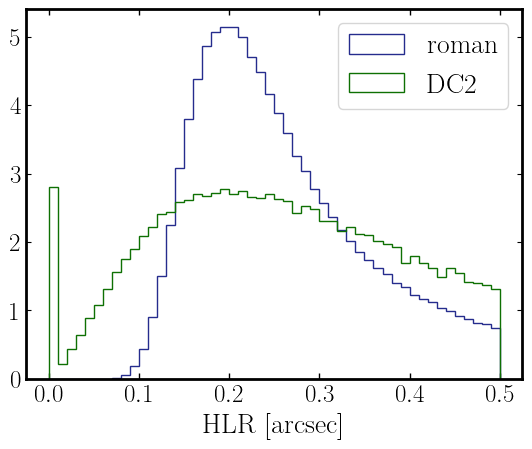

In [48]:
plt.close()
plt.hist(rd_roman, histtype="step", range=(0, 0.5), bins=50, label="roman", density=True)
plt.hist(rd_dc2, histtype="step", range=(0, 0.5), bins=50, label="DC2", density=True)
plt.legend()
plt.xlabel("HLR [arcsec]")

Text(0.5, 0, 'HLR [arcsec]')

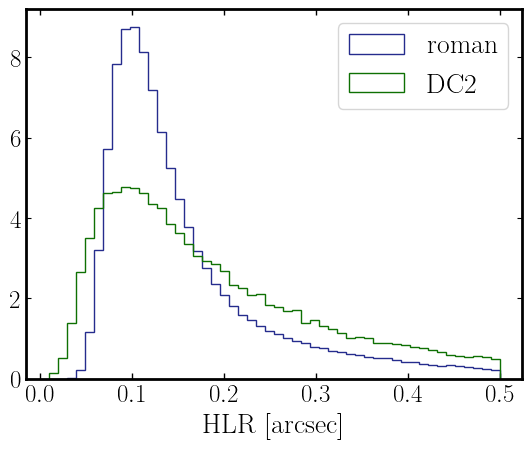

In [49]:
plt.close()
plt.hist(rb_roman, histtype="step", range=(0.01, 0.5), bins=50, label="roman", density=True)
plt.hist(rb_dc2, histtype="step", range=(0.01, 0.5), bins=50, label="DC2", density=True)
plt.legend()
plt.xlabel("HLR [arcsec]")

In [8]:
fname = "/work/xiangchong.li/superonionGW/code/image/catsim/rubinroman_nside32_10307.parquet"
data = astTable.Table.read(fname)

In [9]:
data.as_array

<bound method Table.as_array of <Table length=3561877>
  galaxy_id            ra         ... roman_bulgefrac_F184 roman_bulgefrac_K213
    int64           float64       ...       float64              float64       
-------------- ------------------ ... -------------------- --------------------
10307000647975 11.004214985349135 ...   0.8015920534558612   0.8015920519702856
10307000647976   10.4572514769743 ...  0.24073644822211762  0.24073645239825345
10307000647977 10.461232756109153 ...   0.8069449111053388   0.8079381884230195
10307000647978 10.457563225057468 ...   0.5626642160312119   0.5626642326655407
10307000647979 10.456032881467014 ...   0.3569330160333952   0.3569330237202661
10307000647980 10.912042487920381 ...   0.7495203236256427   0.7510457379179644
10307000647981 10.912885546681133 ...  0.33952396455810596   0.3414250904771122
10307000647982 10.523430524925852 ...   0.4464619163927709   0.4468417389063595
10307000647984 11.010902238437914 ...   0.6241989699648395   0.62

In [9]:
help(a.get_objlist)

Help on method get_objlist in module xlens.simulator.galaxies.skyCatalog:

get_objlist(*, survey) method of xlens.simulator.galaxies.skyCatalog.OpenUniverse2024RubinRomanCatalog instance
    get a list of galsim objects, position shifts, redshifts and indices
    
    Parameters
    ----------
    survey: object with survey parameters
    
    Returns
    -------
    [galsim objects], [shifts], [redshifts], [indexes]



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Training SOM...
Training complete!


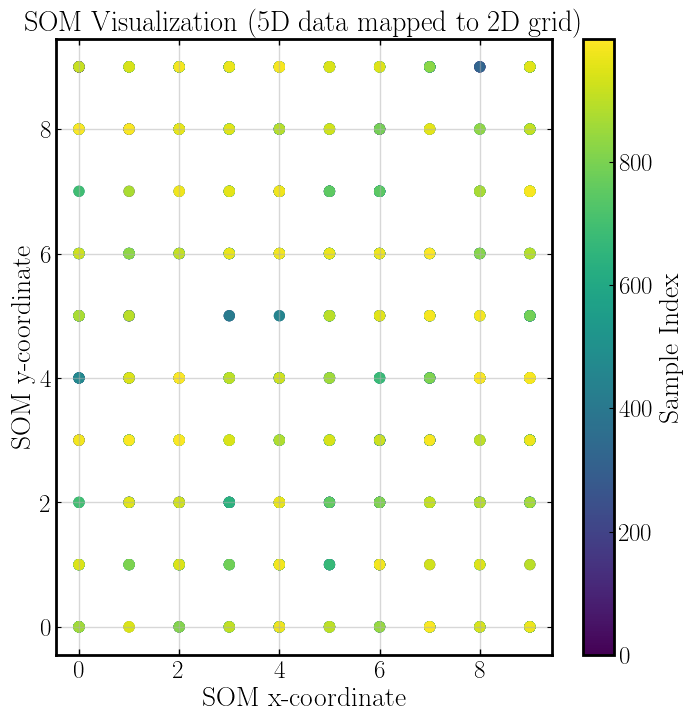

SOM weights shape: (10, 10, 5)


In [ ]:
# Step 1: Generate a random 5D dataset
np.random.seed(42)  # For reproducibility
num_samples = 1000
data = np.random.rand(num_samples, 5)  # 5D data

# Step 2: Normalize the data (MiniSom works better with normalized data)
data_min = data.min(axis=0)
data_max = data.max(axis=0)
data_normalized = (data - data_min) / (data_max - data_min)

# Step 3: Initialize the SOM
# SOM grid size (e.g., 10x10) and input dimensionality (5 for 5D data)
som_size = (10, 10)
som = MiniSom(som_size[0], som_size[1], 5, sigma=1.0, learning_rate=0.5)

# Step 4: Train the SOM
print("Training SOM...")
som.random_weights_init(data_normalized)
som.train_random(data_normalized, 1000)  # Train for 1000 iterations
print("Training complete!")

# Step 5: Visualize the SOM
# Map each data point to its winning neuron
mapped = np.array([som.winner(d) for d in data_normalized])

# Create a scatter plot of the mapped data
plt.figure(figsize=(8, 8))
plt.scatter(, c=np.arange(num_samples), cmap="viridis", s=50)
plt.colorbar(label="Sample Index")
plt.title("SOM Visualization (5D data mapped to 2D grid)")
plt.xlabel("SOM x-coordinate")
plt.ylabel("SOM y-coordinate")
plt.grid()
plt.show()

# Step 6: (Optional) Access the SOM weights
# The weights of the SOM after training
weights = som.get_weights()
print(f"SOM weights shape: {weights.shape}")

(array([[11.,  4.,  6.,  7., 11., 10.,  2., 14., 10.],
        [ 8.,  8.,  9.,  7.,  5., 13.,  2.,  7., 13.],
        [13., 10., 10.,  9.,  0., 10.,  4., 13., 14.],
        [ 5., 10.,  8., 13.,  3., 13.,  9.,  8., 17.],
        [13., 14.,  8., 11.,  2., 11., 13., 12., 17.],
        [ 6.,  8., 13.,  8., 11., 16.,  9.,  7., 15.],
        [11., 14., 12.,  6.,  8., 13., 13.,  9., 12.],
        [ 2., 11., 12.,  8., 11.,  7.,  0.,  7., 17.],
        [ 6., 22.,  5., 15.,  5.,  9.,  9.,  4.,  5.],
        [ 2., 10., 14., 22., 13., 11., 15., 14., 18.]]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <matplotlib.collections.QuadMesh at 0x7fbba5dd7790>)

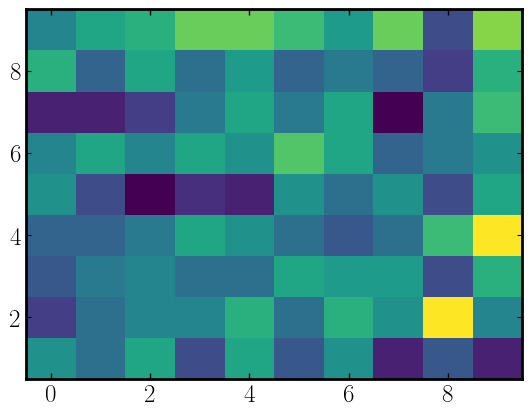

In [6]:
plt.close()
plt.hist2d(mapped[:, 0], mapped[:, 1], bins=(np.arange(-0.5, 10, 1), np.arange(0.5, 10, 1)))